# Power Transformer

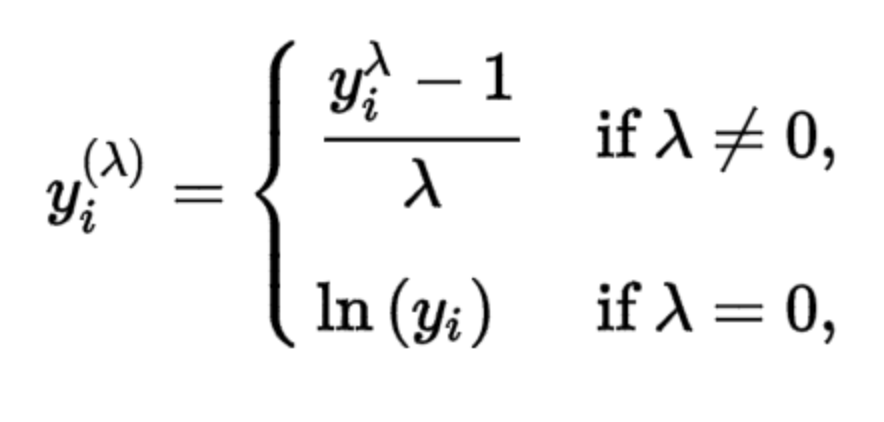

In [3]:
# Importing Libraries

import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [7]:
import os
os.chdir('/Users/arnabmaji/Documents/Documents/CSV Raw Data')
os.getcwd()

'/Users/arnabmaji/Documents/Documents/CSV Raw Data'

In [8]:
df = pd.read_csv('concrete_strength.csv')

In [9]:
for a in df.columns:
    df[a] = df[a].astype(float, errors = 'raise')


In [10]:
df.shape

(1030, 9)

In [11]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Strength',axis = 1),df[['Strength']],test_size = 0.25, random_state = 1)

In [13]:
df.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                   float64
Strength              float64
dtype: object

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/var/folders/sf/b_0tzfjj78l7hl5p3f6nz3g40000gn/T/ipykernel_1181/1182110291.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, 

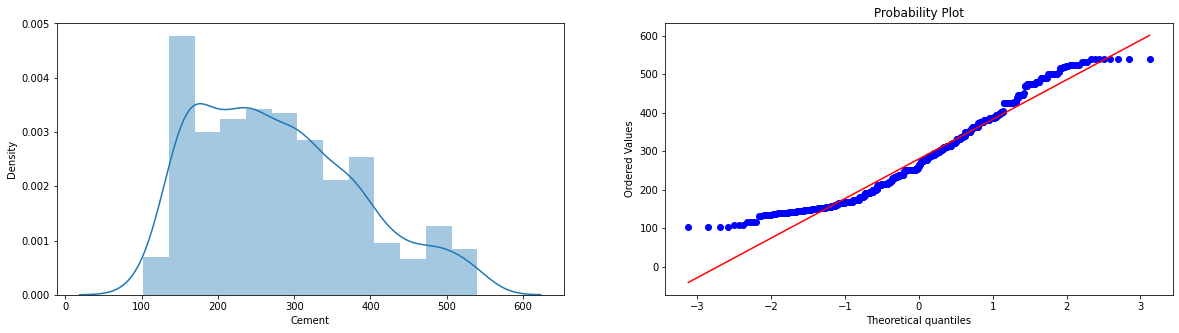

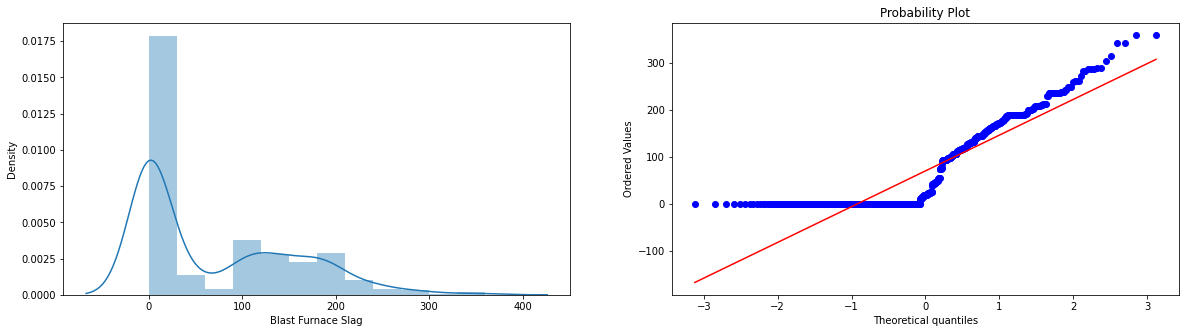

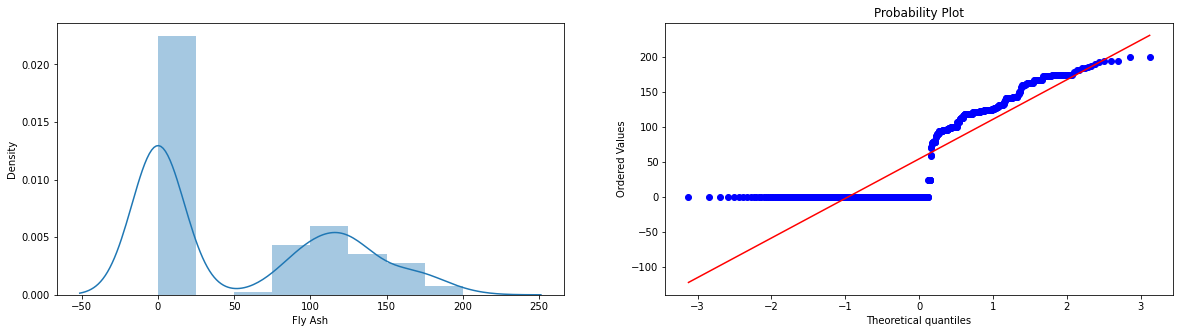

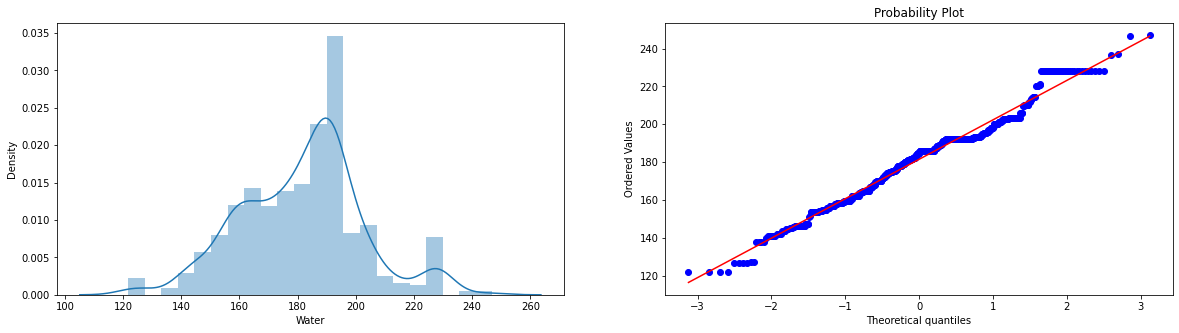

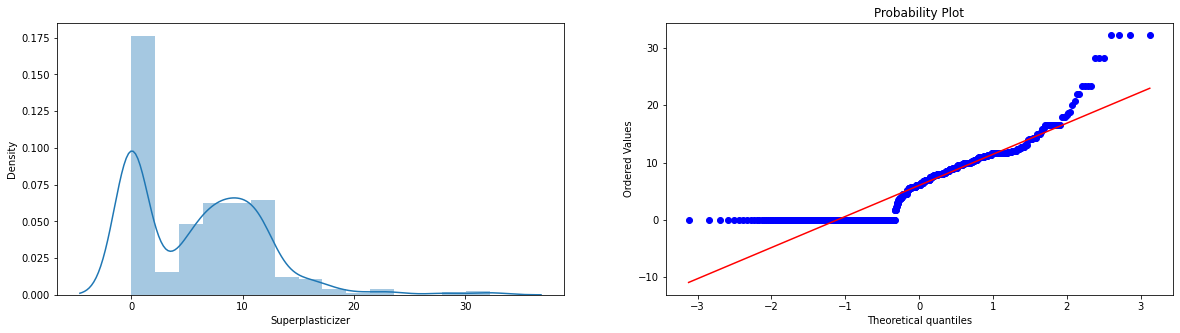

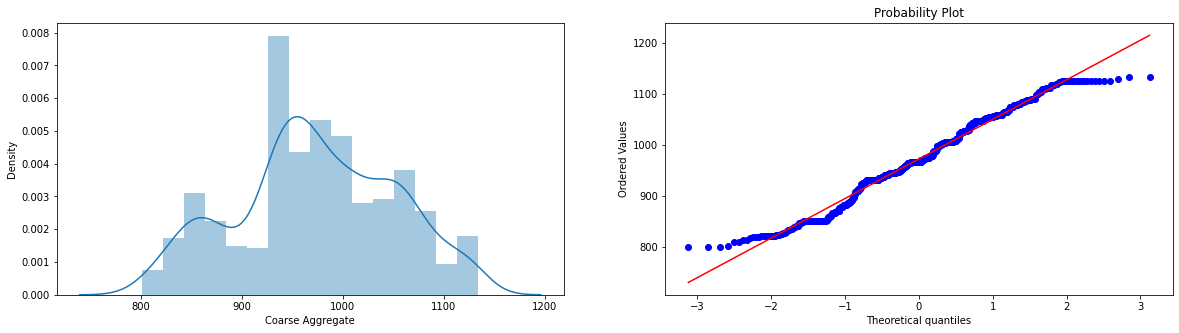

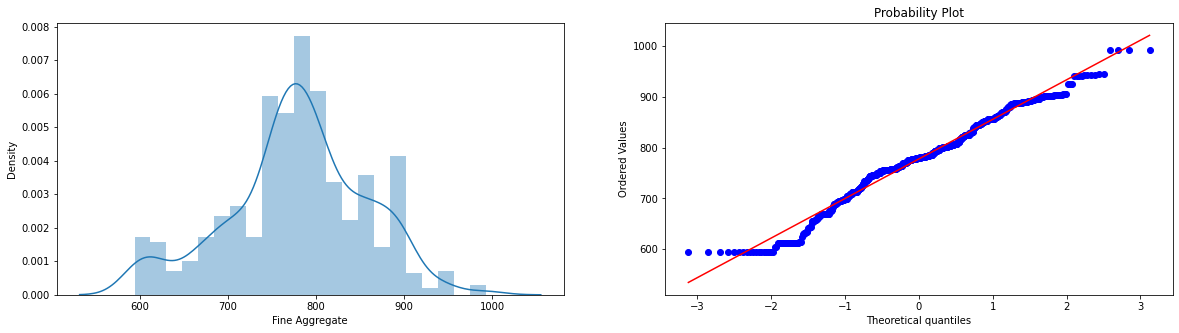

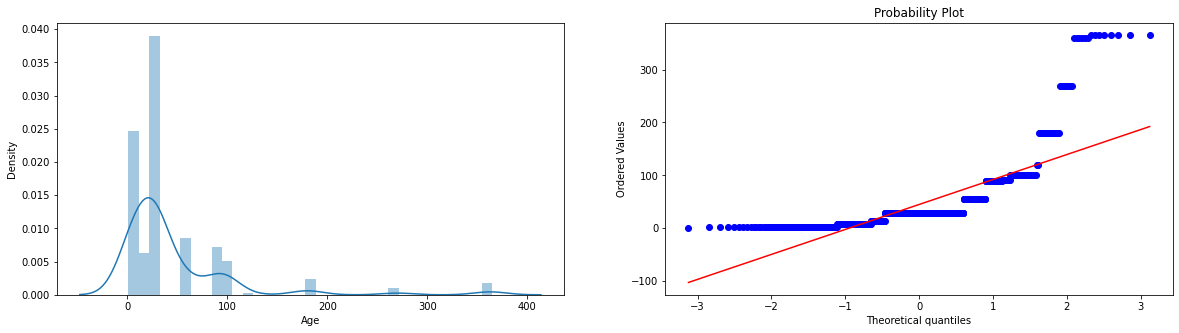

In [14]:
for col in X_train.columns:
    fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (20,5))
    sns.distplot(X_train[col], ax = ax1)
    stats.probplot(X_train[col], dist="norm", plot=ax2)
    fig.show()
    

In [15]:
# Applying Box-Cox Transformer on the data
# The default method is Yeo-Johnson method, hence specifying box-cox 
pt = PowerTransformer(method = 'box-cox')

In [22]:
X_train_power_transformed = pt.fit_transform(X_train + 0.000000001)
X_test_power_transformed = pt.transform(X_test + 0.000000001)

In [31]:
X_train_power_transformed_df = pd.DataFrame(X_train_power_transformed, columns = X_train.columns)

In [32]:
pd.DataFrame({'cols':X_train.columns,'box-cox':pt.lambdas_})

,cols,box-cox
0,Cement,0.126689
1,Blast Furnace Slag,0.013222
2,Fly Ash,-0.023397
3,Water,0.959689
4,Superplasticizer,0.069551
5,Coarse Aggregate,1.281035
6,Fine Aggregate,1.842802
7,Age,0.052375


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/var/folders/sf/b_0tzfjj78l7hl5p3f6nz3g40000gn/T/ipykernel_1181/1920504942.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, 

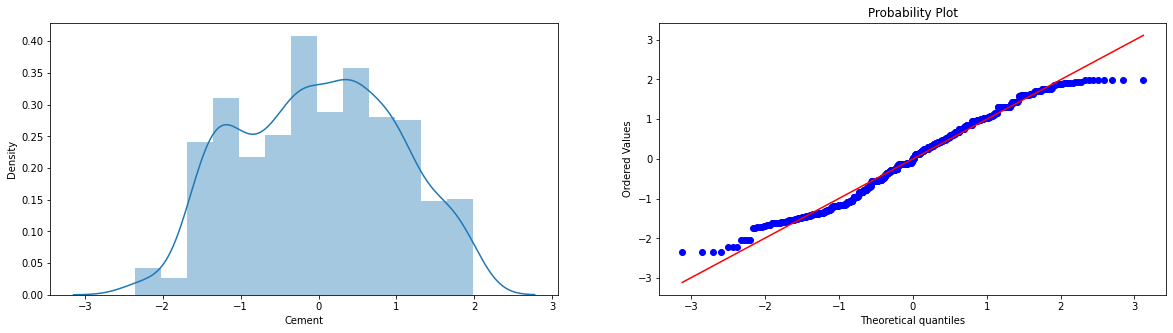

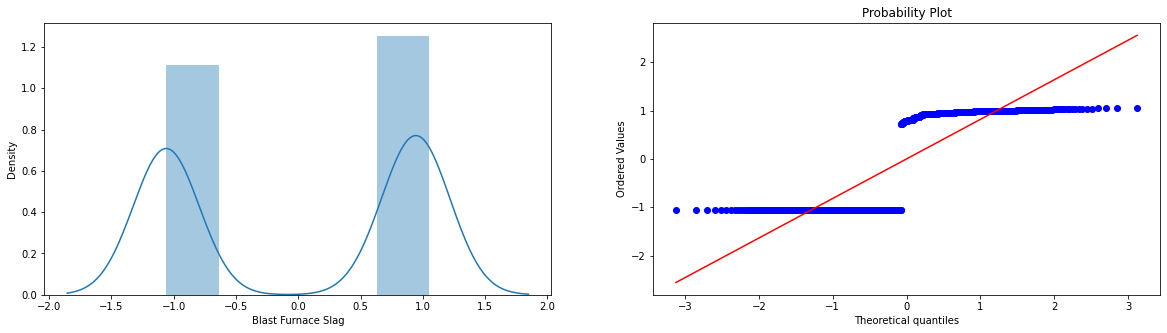

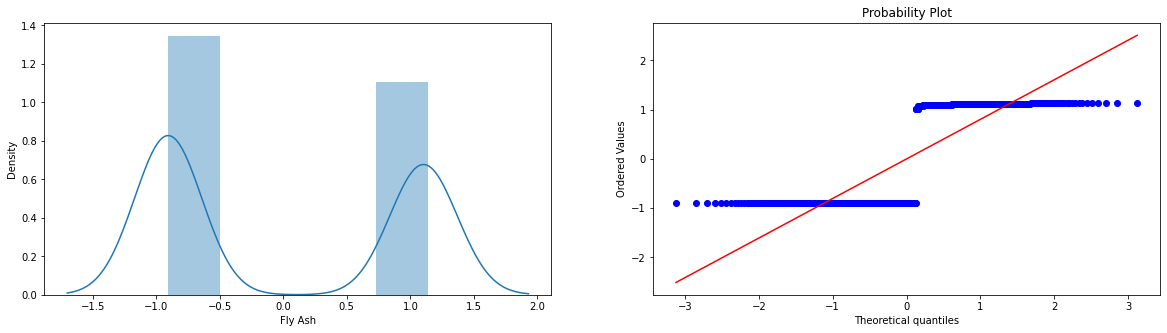

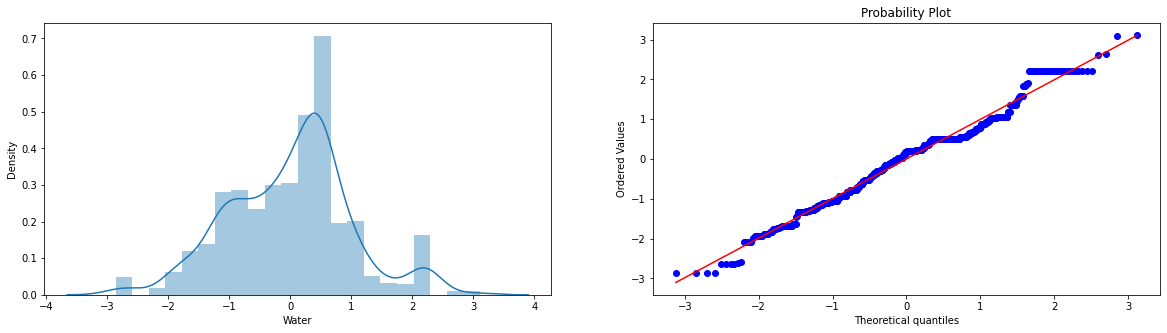

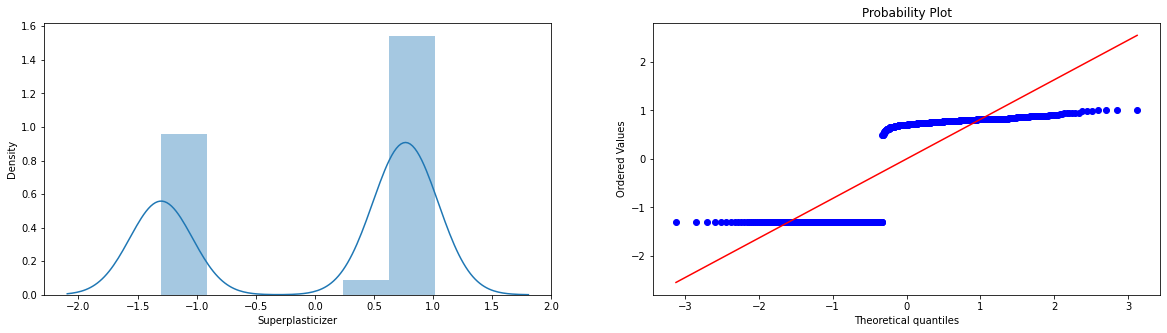

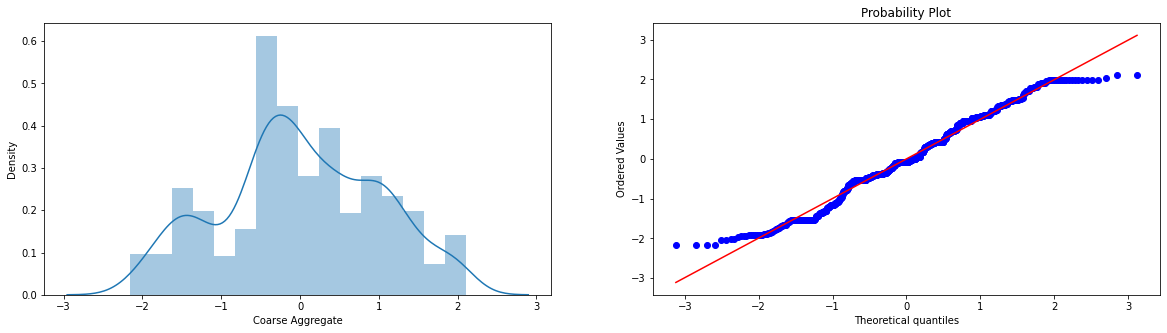

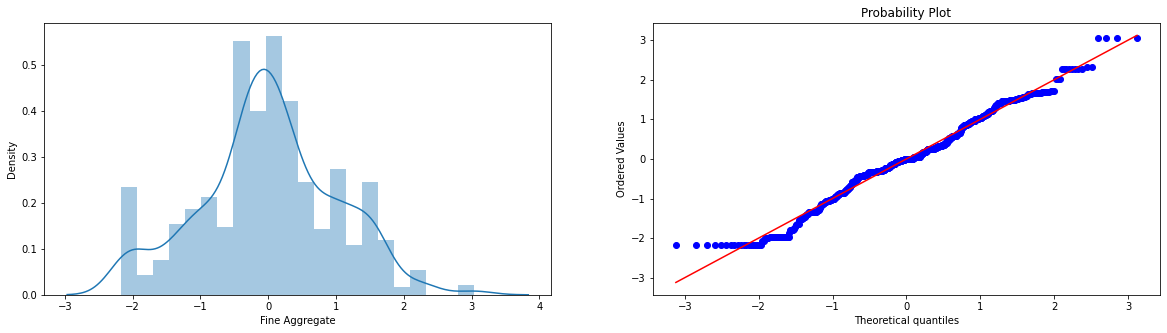

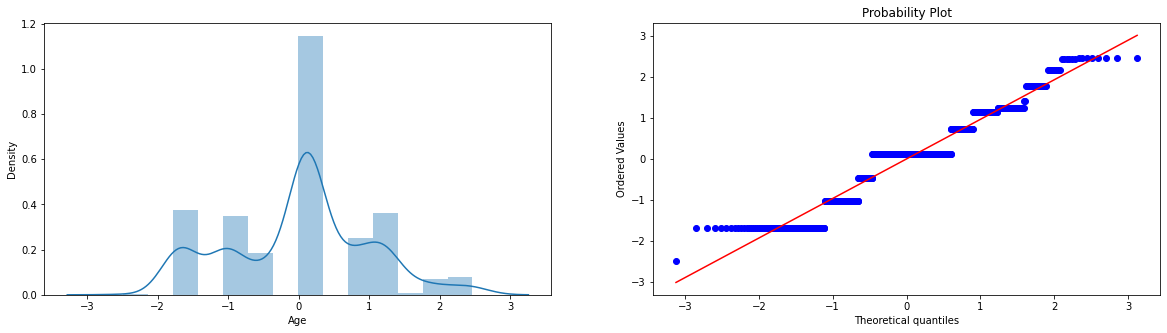

In [34]:
# Dist and QQ plot after transformation
for col in X_train_power_transformed_df.columns:
    fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (20,5))
    sns.distplot(X_train_power_transformed_df[col], ax = ax1)
    stats.probplot(X_train_power_transformed_df[col], dist="norm", plot=ax2)
    fig.show()
    

In [38]:
# Applying Linear Regression on un-transformed data
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_pred, y_test)

0.41246045843585

In [43]:
np.mean(cross_val_score(lr,df.drop('Strength', axis = 1),df[['Strength']],scoring='r2'))

0.4609940491662866

In [44]:
# Applying Linear Regression on transformed data
lr = LinearRegression()
lr.fit(X_train_power_transformed, y_train)
y_pred = lr.predict(X_test_power_transformed)
r2_score(y_pred, y_test)

0.7599595032743792

In [47]:
np.mean(cross_val_score(lr,X_train_power_transformed,y_train,scoring='r2'))

0.8013392198418178

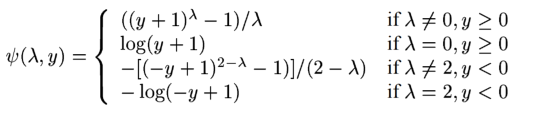

In [49]:
pt2 = PowerTransformer()

X_train_yeojohnson_transformed = pt2.fit_transform(X_train)
X_test_yeojohnson_transformed = pt2.transform(X_test)

In [50]:
# Applying Linear Regression on transformed data
lr = LinearRegression()
lr.fit(X_train_yeojohnson_transformed, y_train)
y_pred = lr.predict(X_test_yeojohnson_transformed)
r2_score(y_pred, y_test)

0.7593558446096629

In [51]:
np.mean(cross_val_score(lr,X_train_yeojohnson_transformed,y_train,scoring='r2'))

0.8060988872153464

In [52]:
pd.DataFrame({'cols':X_train.columns,'lambda_values':pt2.lambdas_})

,cols,lambda_values
0,Cement,0.123716
1,Blast Furnace Slag,-0.008210
2,Fly Ash,-0.134857
3,Water,0.959328
4,Superplasticizer,0.256556
5,Coarse Aggregate,1.281432
6,Fine Aggregate,1.843936
7,Age,0.005892


In [55]:
X_train_yeojohnson_transformed = pd.DataFrame(X_train_yeojohnson_transformed , columns = X_train.columns)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/var/folders/sf/b_0tzfjj78l7hl5p3f6nz3g40000gn/T/ipykernel_1181/2342479996.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, 

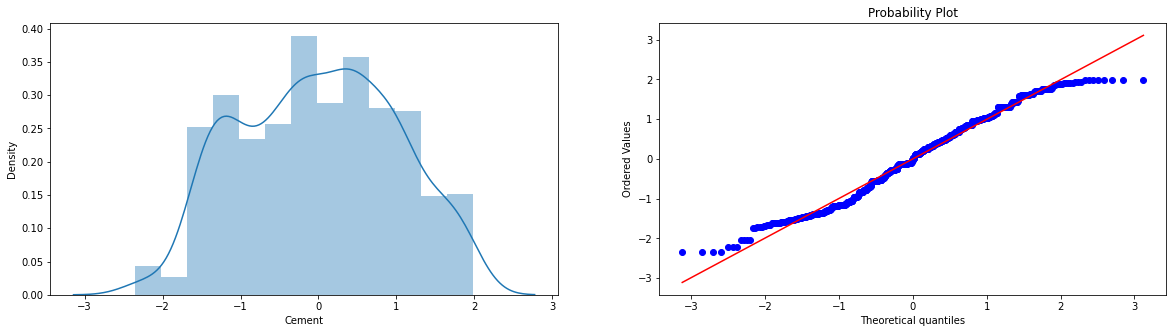

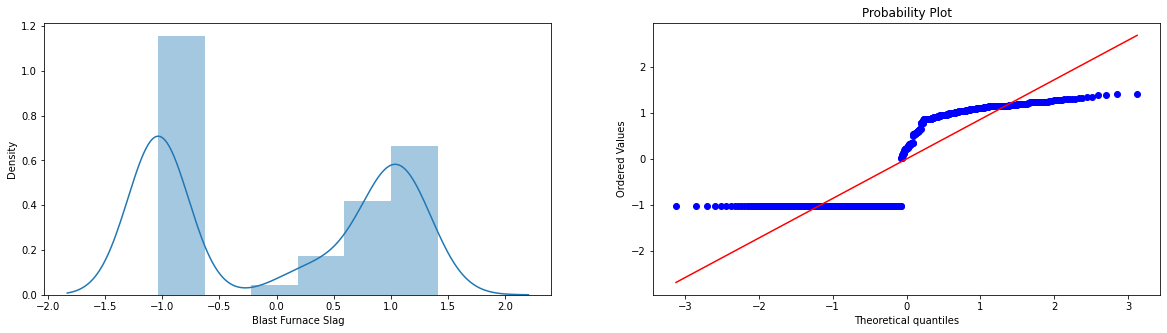

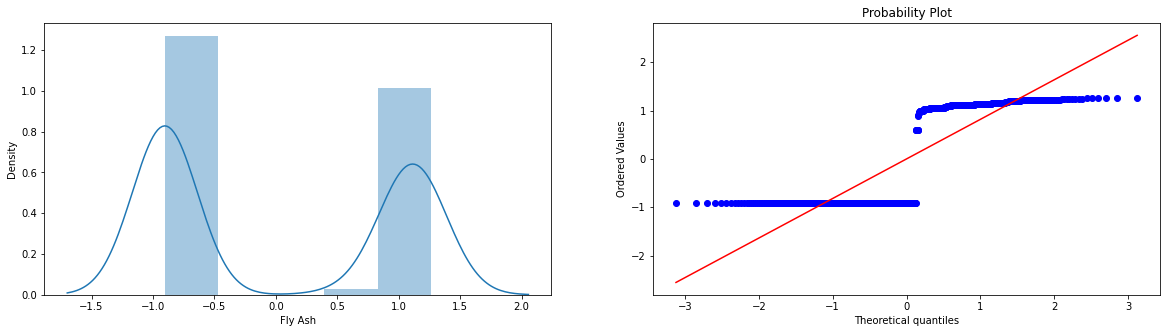

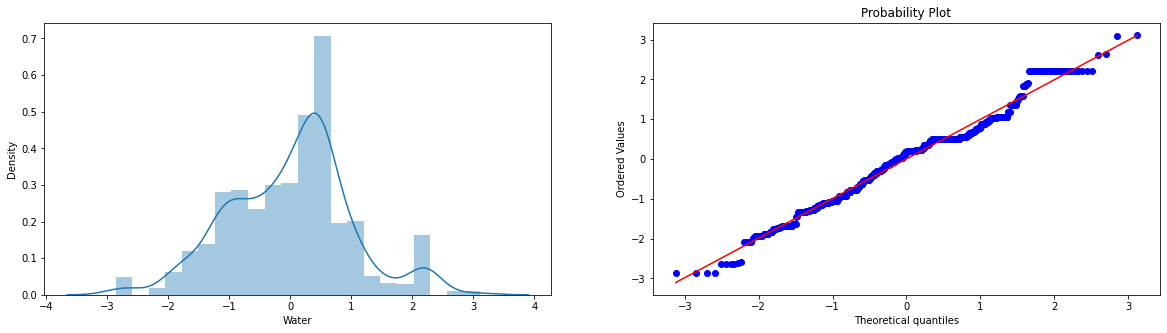

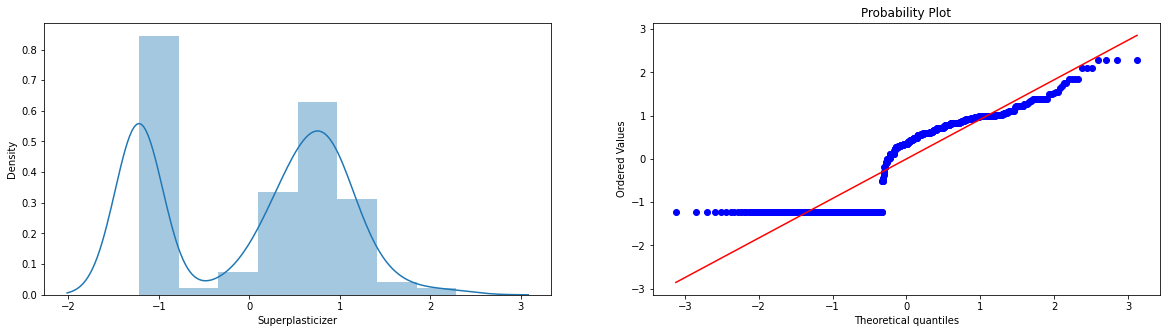

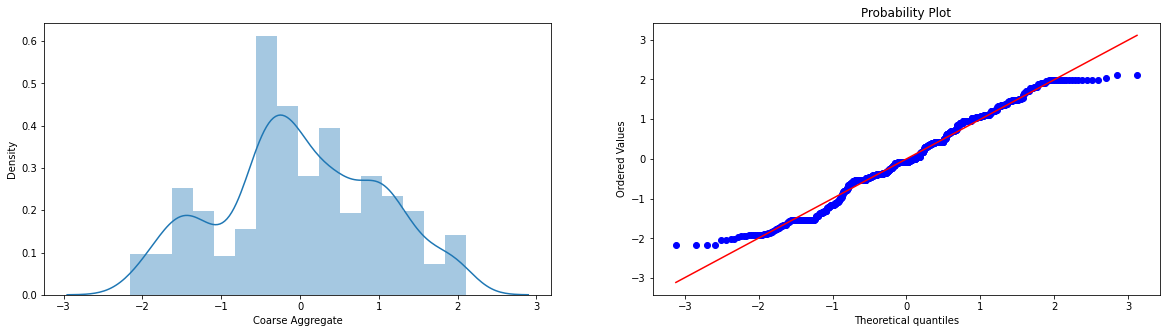

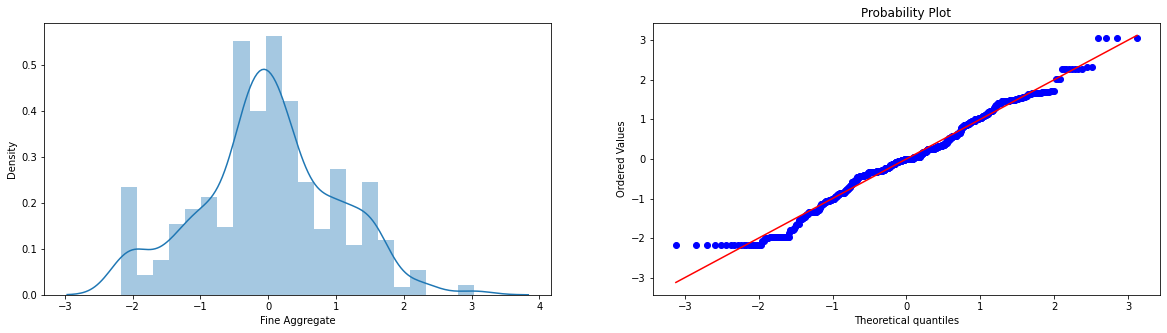

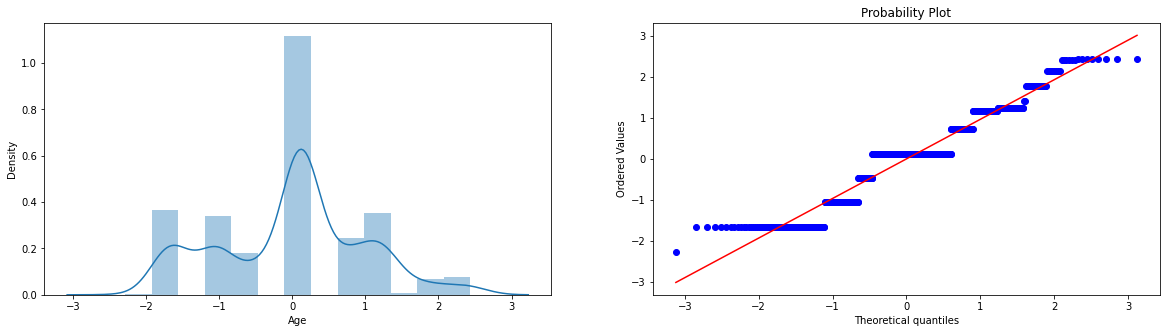

In [56]:
# Dist and QQ plot after yeo- johnson transformation
for col in X_train_yeojohnson_transformed.columns:
    fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (20,5))
    sns.distplot(X_train_yeojohnson_transformed[col], ax = ax1)
    stats.probplot(X_train_yeojohnson_transformed[col], dist="norm", plot=ax2)
    fig.show()
    